In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

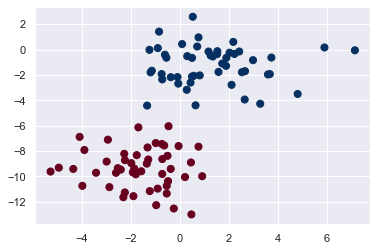

In [6]:
from sklearn.datasets import make_blobs
# generate 100 points with two centers and labeled by y (0,1)
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

In [8]:
# gaussian fit
# using Bayes's theorem, know the distribution -> know the P(features | L1) for each gaussian distribution
# you need to know the lable for training and determine the guassian distribution
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);

In [9]:
rng = np.random.RandomState(0) # 2000 0-1 numbers
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2) # spread all over the space
ynew = model.predict(Xnew)

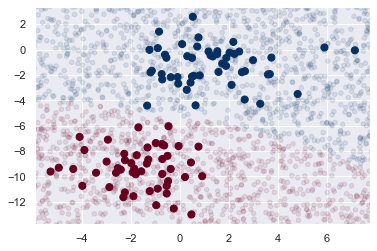

In [21]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1) # alpha is the transition
plt.axis(lim);

In [26]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)
# posterior probabilities of the first and second label

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

In [27]:
# Multinomial Naive Bayes
# The multinomial distribution describes the probability of observing counts among a number of categories, and thus multinomial naive Bayes is most appropriate for features that represent counts or count rates.
# still, what we want is P(features | L1), which is given a model, what is the probablity of chooing a specific score of every word? We can find the Multinomial model (simply get the score of every word) for each category and then we can make classification

from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [28]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

# convert the content of each string into a vector of numbers and train using multinomial
# TfidfVectorizer will convert every word into a number label and count the number of each label in every file, and show the  tf-idf score
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [74]:
# example of using TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = ['aaa bbb aaa aaa aaa',
'aaa, bbb, ccc',
'aaa, aaa, aaa, aaa, aaa'
]

corpus2 = ['The sky is blue',
'The sky is not blue'
]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())
# the  tf-idf score, increase when one word increase in a file but decrease with the number of documents that contain the word, to avoid very frequent word like a, the ...
print(X) # you can see that the word 'ccc' gets more score (1, 2)

print(vectorizer.fit_transform(corpus2))

['aaa', 'bbb', 'ccc']
  (0, 1)	0.30643357962783513
  (0, 0)	0.9518920428685552
  (1, 2)	0.7203334490549893
  (1, 1)	0.5478321549274363
  (1, 0)	0.4254405389711991
  (2, 0)	1.0
  (0, 0)	0.5
  (0, 1)	0.5
  (0, 3)	0.5
  (0, 4)	0.5
  (1, 2)	0.5749618667993135
  (1, 0)	0.40909010368335985
  (1, 1)	0.40909010368335985
  (1, 3)	0.40909010368335985
  (1, 4)	0.40909010368335985


In [35]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

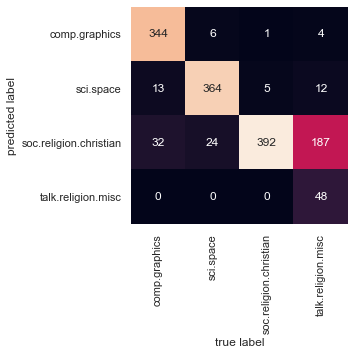

In [36]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels) # compare test and true labels
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [37]:
# try some examples, amazing!
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [38]:
predict_category('sending a payload to the ISS')

'sci.space'

In [39]:
predict_category('discussing islam vs atheism')

'soc.religion.christian'

In [40]:
predict_category('determining the screen resolution')

'comp.graphics'

In [68]:
predict_category('dsadasfhasi') # words not occur always retrun 'soc.religion.christian'

'soc.religion.christian'

In [ ]:
# once you have enough data, even a simple model can be very powerful, because the data is more seperated. Naive bayes suitable for data which is well seperated, can be used at first and see if it works and do we need more advanced methods